In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons

In [2]:
# import TwoLayerNN class from the other notebook
import import_ipynb
import Class_TwoLayerNN

importing Jupyter notebook from Class_TwoLayerNN.ipynb


#### The task : Classify dataset using the network that we build in the "Class_TwoLayerNN.ipynb" file

In [11]:
x,y = make_moons(n_samples=400, shuffle=False, noise=.15)

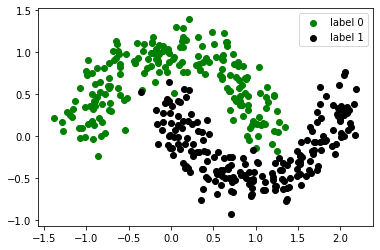

In [17]:
#scatter plot of data
plt.scatter(x[:200,0],x[:200,1], color = 'green')
plt.scatter(x[200:,0],x[200:,1], color = 'black')
plt.legend(('label 0','label 1'))

In [12]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1)

x_trainval, x_val, y_trainval, y_val=train_test_split(x_train,y_train,test_size=0.1)

In [13]:
# hyperparameters tuning

best_score = 0

hidden_neurons = np.arange(5,15)
learning_rates = [0.05, 0.08, 0.1, 0.12, 0,15] 
minibatch_sizes = [10, 20, 30, 40] 
iterations = [40000, 45000, 50000] 

for hidden_neuron in hidden_neurons :
    for learning_rate in learning_rates :
        for minibatch_size in minibatch_sizes :
            for iteration in iterations : 

                # the model
                nn = Class_TwoLayerNN.TwoLayerNN(2,hidden_neuron)    
                # train the model
                nn.sgd(x_trainval, y_trainval, learning_rate, minibatch_size,iteration) 
                # accuracy over validation set
                score = accuracy_score(y_val , np.where(nn.feedForward(x_val) > 1/2, 1, 0)  )

                if score > best_score :
                    best_score = score
                    opt_param = {'hidden_neurons' : hidden_neuron,
                                'learning_rate' : learning_rate,
                                'minibatch_size' : minibatch_size,
                                'iterations' : iteration}


Class_TwoLayerNN.ipynb:38: RuntimeWarning: overflow encountered in matmul
  "        \n",
Class_TwoLayerNN.ipynb:45: RuntimeWarning: invalid value encountered in multiply
  "         minibatch_values= np.dot(self.layer2,self.W2) + self.bias3  \n",
Class_TwoLayerNN.ipynb:51: RuntimeWarning: invalid value encountered in multiply
  "         \n",
Class_TwoLayerNN.ipynb:45: RuntimeWarning: invalid value encountered in greater_equal
  "         minibatch_values= np.dot(self.layer2,self.W2) + self.bias3  \n",
Class_TwoLayerNN.ipynb:51: RuntimeWarning: invalid value encountered in greater_equal
  "         \n",
C:\Users\Vaggelis\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
Class_TwoLayerNN.ipynb:41: RuntimeWarning: invalid value encountered in multiply
  "         size=self.minibatch.shape[0]\n",
Class_TwoLayerNN.ipynb:45: RuntimeWarning: invalid value encountered in matmul
  "         minibatch_values= np.dot(self.layer2,self.W2) 

In [14]:
# final model
print('The optimal parameters are ', opt_param)
model = Class_TwoLayerNN.TwoLayerNN(2, opt_param['hidden_neurons'])
# training
model.sgd(x_train,y_train,opt_param['learning_rate'],opt_param['minibatch_size'],opt_param['iterations'])
# accuracy over the useen data of the test set
model_score = accuracy_score(y_test , np.where(model.feedForward(x_test) > 1/2 ,1,0)  )

The optimal parameters are  {'hidden_neurons': 8, 'learning_rate': 0.08, 'minibatch_size': 10, 'iterations': 40000}


In [15]:
model_score

0.95

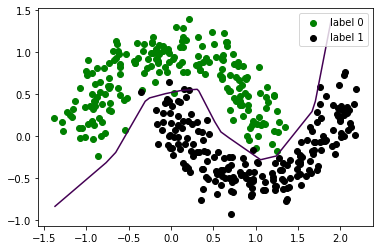

In [16]:
# plotting the classifier

plt.figure()
    
#scatter plot of data
plt.scatter(x[:200,0],x[:200,1], color = 'green')
plt.scatter(x[200:,0],x[200:,1], color = 'black')
plt.legend(('label 0','label 1'))

#contour line of learned classifier
x_min = x[:,0].min()
y_min = x[:,1].min()
x_max = x[:,0].max()
y_max = x[:,1].max()

u = np.linspace(x_min,x_max, 20)
v = np.linspace(y_min,y_max, 20)
xx, yy = np.meshgrid(u,v) 
xx_line = np.resize(xx,(20**2,1))
yy_line = np.resize(yy,(20**2,1))         
t = np.concatenate((xx_line,yy_line), axis = 1)
z_pre=model.feedForward(t)
z_post = np.resize(z_pre,(20,20))  
plt.contour(xx,yy,z_post, levels = [1/2])